In [1]:
using CSV, DataFrames, Plots

using Jedi

Jedi.default_gr!()

Plots.GRBackend()

In [4]:
df = CSV.read("../outputs/2021_02_04_results.csv", DataFrame);

,p_l,l,kappa
,Float64,Float64,Float64
1,0.0145853,61.0,0.0
2,0.0194533,62.0,0.0
3,0.0129709,63.0,0.0
4,0.0432538,64.0,0.0
5,0.101428,65.0,0.0
6,0.0689626,66.0,0.0
7,0.070278,67.0,0.0
8,0.0417293,68.0,0.0
9,0.0499981,69.0,0.0


In [11]:
K(x, x_arr, y_arr, h) = 1/sum(y_arr)/h * sum([exp(-1/2*((x - x_arr[i])/h)^2) * y_arr[i] for i in eachindex(x_arr)])

K (generic function with 1 method)

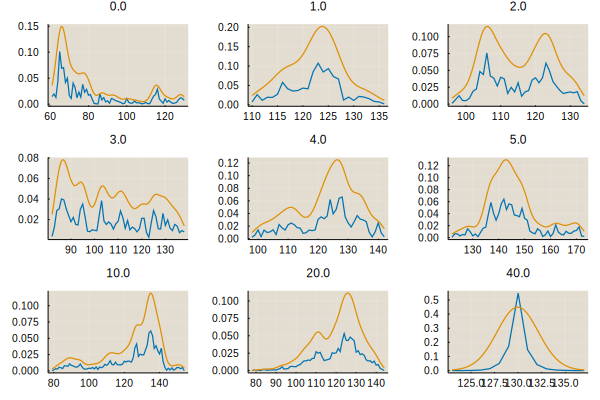

In [21]:
cdf = groupby(df, :kappa)
p_list = []
for _df in cdf
    x = _df.l
    y = _df.p_l
    x_kd = collect(minimum(x):0.1:maximum(x))
    y_kd = [K(t, x, y, 2) for t in x_kd]
    p = plot(_df.l, _df.p_l, title=_df.kappa[1])
    plot!(p, x_kd, y_kd)
    push!(p_list, p)
end
plot(p_list...)